In [1]:
import nbsetup as nbs
import numpy as np
from simulations.wealth.models import MoneyAgent, MoneyModel
from helpers.ergodic import ErgodicEnsemble

In [2]:
def batch(agents, level, timesteps, ensembles):
    initial = []
    observations = []
    
    for e in range(ensembles):
        
        nbs.cp("Working on %s" % e)
        # generate a random wealth distribution
        c = np.random.randint(3)
        if c == 0:
            wealths = np.random.random(agents)
        elif c == 1:
            wealths = np.ones(agents)
        elif c == 2:
            wealths = np.random.choice([0,1], agents)
        
        # create the model
        model = MoneyModel(wealths, level)
        
        # save initial setup
        initial.append([a.wealth for a in model.schedule.agents])
        
        # then continue on for rest of timesteps
        for i in range(timesteps):
            model.step()
        
        # save end setup
        observations.append([a.wealth for a in model.schedule.agents])
    
    # convert
    initial = np.array(initial)
    observations = np.array(observations)
    bins = np.arange(observations.max()+2)
    
    return ErgodicEnsemble(initial, bins), ErgodicEnsemble(observations, bins)


Working on 1


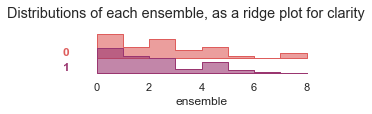

In [10]:
ei, ee = batch(agents=50, level=2, timesteps=10, ensembles=2)
ee.ridge()


Working on 9
ensemble
55.3% ergodic complexity
0.917 (2.053) average ensemble (ergodic)
From 10 ensembles
With bins 18 from 0.0 to 18.0.

ensemble
1.1% ergodic complexity
2.552 (2.579) average ensemble (ergodic)
From 10 ensembles
With bins 18 from 0.0 to 18.0.



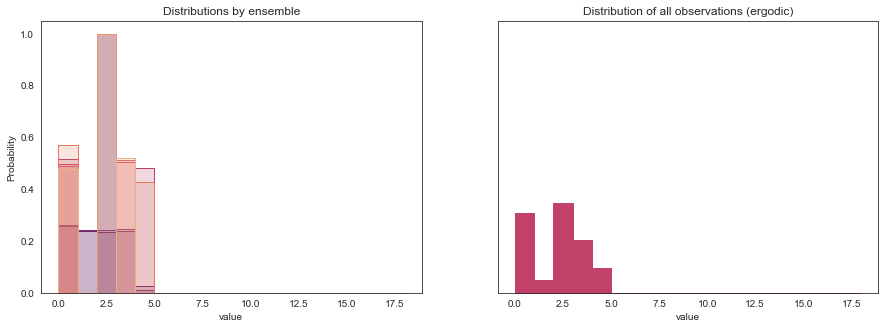

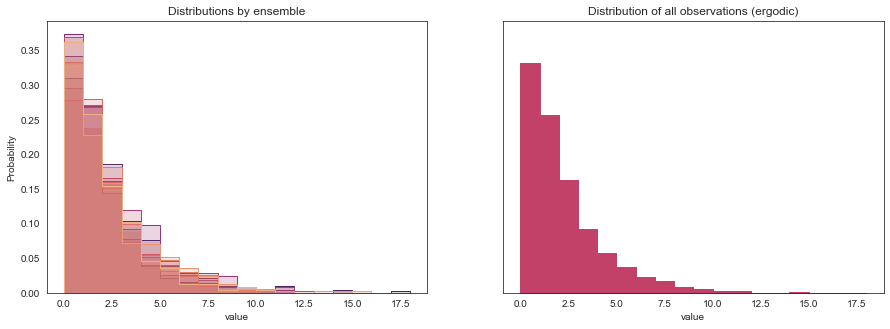

In [3]:
ei, ee = batch(agents=500, level=2, timesteps=1000, ensembles=10)

# create initial ee
ei.stats()
ei.plot()

# create end ee
ee.stats()
ee.plot()

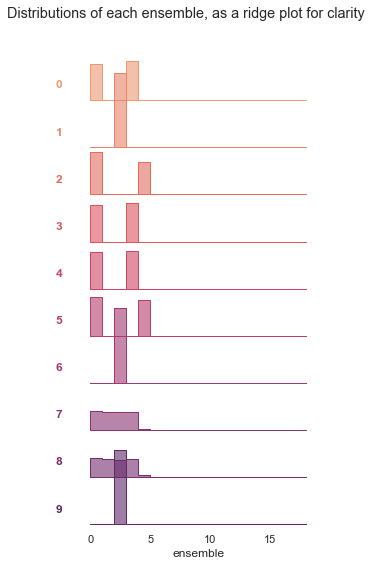

In [8]:
ei.ridge()